# Experiment 1 Data Processing

We're going to use Python to calculate some basic descriptive statisics on Module 1 data, which will help you determine whether you and your classmates were working with different NaCl standards.  (In a future lab, you'll learn to use Python to graph an external calibration curve, solve for unknown concentrations, and analyze the error involved in this process.)

At first, some of this Python code is going to look like greek to you!  However, look it over carefully, and try to follow the logic, but don't get too bogged down in the details.  As you learn to code in Python during the semester, you will eventually clearly understand everything you are seeing here!  For now, let's just take a look at what Python can do!

## Average, Standard Deviation and Confidence Interval:

In [2]:
# A data array is a single variable that holds a list of numbers (or other types of data).  
# Let's start by pooling the water density data from your group into one 1-D data array we'll call "H2Odens".
# Go ahead and replace the 1's and 2's below with real density data measured for water:
H2Odens=[1,2,1,2]

# Now, find the average and the standard deviation for NaCl_unk by running the code in this code block.
# (Feel free to copy and paste these code blocks to wherever you need them,
# but be careful to update anything you might need to change!) 

# Import and then use statistical function package "scipy.stats"
import scipy.stats as stats
average_H2Odens = stats.tmean(H2Odens)
s_H2Odens = stats.tstd(H2Odens)

# Output results
print ("the average density of tap water is " + str(average_H2Odens) + " +/- " + str(s_H2Odens) + " g/mL")

the average density of tap water is 1.5 +/- 0.5773502691896257 g/mL


<b> Whoa, thats a lot of digits! </b> That can't possibly be the right number of significant digits, right? Remember that the computer only knows how to do what you tell it to do.  So if you don't tell it to round to a certain number of digits, it will just give you everything it has stored.  (Apparently, it calculated your standard deviation to 16 digits after the decimal.)  So let's figure out how to round those numbers to something a little more reasonable.

### The New Rules For Sig. Figs:

1. Round your measured value to the first significant digit of the uncertainty attached to it (standard deviation, confidence interval, tolerance, etc.)
2. Uncertainty values should have only <b> one </b> sig. fig, unless they start with a 1, in which case you may keep one additional digit.

So, to what place should we round off your average density?



In [3]:
# Rounding numbers
# Try out different values of i until you get an output that looks right!
i = 10
s_H2Odens_out = round(s_H2Odens,i)
average_H2Odens_out = round(average_H2Odens,i)

print ("the average density of tap water is " + str(average_H2Odens_out) + " +/- " + str(s_H2Odens_out) + " g/mL")

the average density of tap water is 1.5 +/- 0.5773502692 g/mL


Be sure to report the average and standard deviation for tap water density to the correct number of sig figs in your lab notebook R/A section!

### How to calculate a confidence interval

The equation for confidence interval is  $ CI= {\frac {ts}{\sqrt {n}}} $.  We can get n from the length of the array (using the <b>len()</b> function), and you already calculated s! So now we just need t. Luckily, Python has t-tables built in, so we just have to tell it what confidence level we are interested in! See the code below, and then alter it to give you the correct sig figs:

In [ ]:
import math

# To look up t-critical using the stats.t.ppf function, the first input is confidence level, currently set to 95%; 
# the second input (after the comma) is degrees of freedom (n-1)
conf = 0.95
t = stats.t.ppf(conf, len(H2Odens)-1)

# Calculate the confidence interval
CI_H2Odens = s_H2Odens*t/math.sqrt(len(H2Odens))

# Output results
print ("The average density is " + str(average_H2Odens) + " +/- " + str(CI_H2Odens) + "g/mL at the " + str(conf) + " confidence level.")

This code was written for a 95% confidence interval. Try it out for 90% and 75% confidence intervals, too! Record all three values in your ELN R/A section, and be sure to explain the trend!

##  The Grubbs test, or how to discard outliers
Now you have the average, standard deviation, and confidence interval of your data. Do you think there might be any outliers in the group? Are there any values which seem really far away from your mean, and which you think might be the result of a systematic error (the empty cylinder was wet, the wrong liquid was measured, etc.), rather than just random variation?

We can't just go throwing out data points because we don't like them -- that would violate the scientific method and bias our results. But data can get legally tossed for either of the following reasons.  
1. We have a recorded observation documenting that there was a problem with a data point when it was collected.
1. A data point fails a statistical test, indicating that it is very likely to be erroneous.

The <b>Grubbs test</b> is the 2nd option -- you may be familiar with it from General Chemistry lab.  It will tell us how likely it is that the data point we're suspicious about was produced by random variation, rather than an error. Here is a quick summary of how it works:

First, we must calculate a G value for our data, using our average ($ {\bar  {x}} $ ), our standard deviation (s) and the possible outlier ( $ x_{i} $ ). We will plug those values into the following equation: $ G={\frac {\left\vert x_{i}-{\bar  {x}}\right\vert }{s}} $

We then compare our G value to a 'G critical' value, which we must look up in a statistical table like the one shown below. Our "null hypothesis" is that our calculated G value will be less than the 'G critical' value, and that our suspicious data point cannot be rejected as an outlier -- the odds that it is the result of random variation are greater than 5% (if we're using the 0.05 column for G critical). 

Only if our calculated G value is greater than the G critical value can we use option 2 and discard the suspicious data point as an outlier.  This Gcalc > Gcrit result tells us there is less than a 5% chance that the suspicious data point is the result of only random variation.  In other words, the chance that the point is erroneous is greater than 95% (the confidence level, 1 - 0.05).  Those odds are acceptable, so we toss the suspicious data point!

<b> Before you continue, answer the following questions in the ELN R/A section. </b>
1. Look at your water density data and pick the most likely outlier. Explain why you think it is the most likely outlier.


2. Calculate G for your suspected outlier. 


3. Look up G critical, and compare it to your calculated G. Is this value an outlier that should be rejected, or not?

Note that the rows in the table are N values (number of measurements in the group, including the suspicious data point), while the columns are the confidence levels (0.05 corresponds to a 95% confidence level, 1 - 0.05 = 0.95).  Also note that you really should not use the Grubb's test if you only have 3 measurements total.  

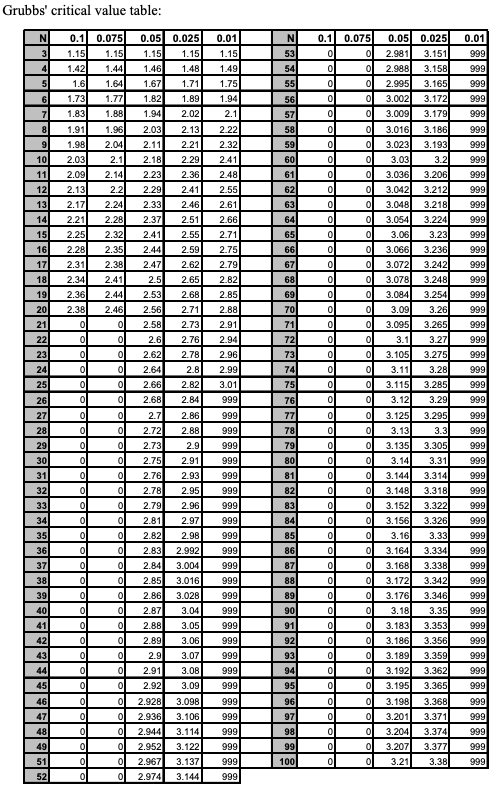

### Programming the Grubbs test with Python

We can write programs which make decisions for us, if we can correctly communicate the criteria of the decision. This turns out to be great for statistical tests like the Grubbs test. But, to do this, we typically have to structure the descision in the form of an "IF statement". For example, "if G calculated is greater than G critical, then the data point is an outlier, and can be discarded."  Use the following code as a starting point to re-do the Grubbs test.  Do you get the same result as when you did it by hand?

In [ ]:
# Python doesn't happen to have an easy look-up for the Grubb's critical values, 
# so just enter the one you looked up in the table above, and complete the comment on the next line:
G_crit = 
# Note: This G_crit value is for ? observations and ? confidence level.

# enter your suspect density value here
suspect = 

G_calc = abs(suspect - average_H2Odens)/s_H2Odens

if G_calc < G_crit:
    print (str(suspect) + " is not an outlier.")
if G_calc > G_crit:
    print (str(suspect) + " is an outlier and should be removed from the data.")


Again, be sure to include this result in your ELN, with an explanation of what you've done here! If you need to remove an outlier, do so now, but be sure to recalculate your average, standard deviation and confidence interval without it, by modifying the inputs in the 1st Python code block on this page, then re-running each subsequent code cell!  (You can re-run all the code cells quickly by clicking on Kernel in the menu and selecting "Restart & Run All".)


# F-tests and t-tests in Python

Now we've done some basic statistics on the density values measured for tap water, but we have a question -- did it matter that we used tap water instead of deionized water, like we would have done if we had been performing the lab in the science building at USD?  In other words, do tap water and deionized water have densities that are significantly different when we're measuring densities with grad. cylinders and mini-scales at home?  This is the kind of question that an F-test and a t-test can help us answer, again making decisions with IF - THEN LOGIC.  In this case, an IF statement we might make along the way will sound like: "if Fcalc is less than Ftable then we must run the t-test for equal variances". 

Make a plan for how to approach the question:  <b>Do tap water and deionized water have densities that are significantly different when measured by grad. cylinders and mini-scales?</b>  Dr. De Haan will supply his measurements of deionized water density for statistical comparison.



Once you've structured your plan, let's get started by getting Dr. De Haan's data! 


In [4]:
# Just like we imported some extra math and statistical functions earlier, we need to import one more package of 
# data functions here.  (You'll learn about the "numpy" function package in the homework due Friday.)

import numpy as np

# We need the average density and standard deviation for your data set, and for Dr. D's.  Dr. D's 
# data is found in the file "Lab1olderData.csv" on Blackboard.  Add your density measurements of tap water to the fourth column,
# labeled "tap", and then resave the file as a csv file in the same folder as this notebook.
# The following code will read this file:
data = np.genfromtxt('Lab1olderData.csv', dtype=float, delimiter=',', names=True) 

# Using "names = True" in our import command has told Python that all of our columns have names in the first row 
# and we can use those names to call the data!

# In order to test that the correct file (with your data added) has been read successfully, let's start by 
# re-calculating the average and std dev of tap water density, since you already know the correct answer!

average_tap = np.nanmean(data['tap'])
s_tap = np.nanstd(data['tap'], ddof=1)
# Note that the population std deviation is calculated with ddof = 0.  We are calculating the sample std deviation.

print ("the average measured density of tap water is " + str(average_tap) + " +/- " + str(s_tap) + " g/mL")

# Test out this code to make sure it reads in the .csv file correctly.  Then, add your own modified code below to calculate 
# and print out averages and standard deviations for Dr. D's 'deion' density data.

# Trouble-shooting note:  If the output result is "nan", you are probably reading the unmodified 'Lab1olderData.csv' file.  
# Remember that the file must be in the same folder as this Jupyter notebook file, and the name must match the code.





the average measured density of tap water is 0.9909333333333333 +/- 0.0008144527815247203 g/mL


Record the averages and standard deviations for both datasets in your ELN (under question 2).  Notice that we used a different function than before to calculate the averages and standard deviations!  The reason can be seen below:

In [5]:
# Run this line of code to see what was read from the .csv file.
print(data)

[(0.9892, 0.9915) (0.9869, 0.99  ) (0.9903, 0.9913)]


Since "data" is a 2-D array of numbers, the way it prints out is different.  The whole array is contained in square brackets [ ], but each row of data is contained in parentheses ( ).  

Notice any "nan" entries in the data?  These are "not a number" notations that Python (using numpy) uses as placeholders whenever it finds empty cells in a row that contains other numerical data.  The numpy averaging and std dev calculations know how to ignore the "nan" entries, while the stats.tmean and stats.tstd functions that we used earlier do not!

OK, now that we've imported all the data properly, time to get to work on the F-test.  Recall that the F-test results tell us whether or not the means of two datasets are similar.
The F-test is calculated as follows:

$$ F_{calculated} = (s_{1}^{2}/s_{2}^{2}) $$

Note that $ s_{1} $ must be the larger standard deviation, so you should always have an F value greater than 1!  Always check this when you do the calculation in the code block below.

In [ ]:
# Just like with t values, we can tell Python to look up critical F values for us using the next line of code!
# This function is asking for the F_crit ad 95% conf level, degrees of freedom = 4 and 5 in the two datasets.
# Modify the code to make it fit a comparison of datasets 'tap' and 'deion'.

F_crit = stats.f.ppf(q=1-0.05, dfn=4, dfd=5)

# Now, build a line of code that calculates F for tap vs deion.  Add print statements for F_crit and F_calc.
# Syntax:  you square a variable using "var**2" where 'var' is the name of the variable.  

F_calc = 

Is <i>F_calc</i> greater than 1?  Great!  That means you've put the variables into the code with the larger one on top.  If not, fix your calculation.

## Using the F-test to choose a t-test
Now we use our F-test result to make a decision about which t-test to use!  We'll use IF statements again to make the decision.

We have two possible methods for calculating our t value.
1. If the variance of the two data sets is the same, then we can use:

$$ {\displaystyle t_{calc}={\frac {{\bar {x}}_{1}-{\bar {x}}_{2}}{s_{pooled}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}} $$

where $$ s_{pooled} = {\displaystyle s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{{1}}^{2}+\left(n_{2}-1\right)s_{{2}}^{2}}{n_{1}+n_{2}-2}}}.} $$


In this case, degrees of freedom is $ d.o.f = n_{1} + n_{2} -2 $

2. If the variance of the two data sets is different, then we must use:
$$ {\displaystyle t={\frac {{\bar {x}}_{1}-{\bar {x}}_{2}}{{\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}}}} $$

and the degrees of freedom equation is a little more complicated:

$$ {\displaystyle \mathrm {d.o.f.} ={\frac {\left({\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}\right)^{2}}{{\frac {\left(s_{1}^{2}/n_{1}\right)^{2}}{n_{1}-1}}+{\frac {\left(s_{2}^{2}/n_{2}\right)^{2}}{n_{2}-1}}}}.} $$


In [ ]:
# Here, add equations for the correct t test and the correct degrees of freedom calculations.  I've included some
# old code to get you started.  Notice that you will have to either update the green n1 and n2 numbers yourself, 
# or better yet turn the green numbers into variables.  You will also have to replace the variable names throughout 
# so they match what you used in previous code cells.
# Finally, two notes on syntax:  There must be a colon at the end of an if statement.  All indented lines after 
# the IF statement are performed if the IF statement is true.

if F_calc < F_crit:
    s_pooled = math.sqrt((24*s_2019A**2 + 24*s_2020A**2)/(24+24-2))
    t_calc = (average_2019A - average_2020A)/(s_pooled * math.sqrt((1/25) + (1/25)))
    dof = 25 + 25 - 2 
    print ("Standard deviations of the two datasets are not significantly different")
    
#
if F_calc > F_crit:
    # Note that s_pooled is not calculated if the two datasets have different std devs.
    t_calc = (average_2019A - average_2020A)/(math.sqrt((s_2019A**2/25)+(s_2020A**2/25)))
    dof_n = ((s_2019A**2/25)+(s_2020A**2/25))**2
    dof_d = (((s_2019A**2/25)**2)/24) + (((s_2020A**2/25)**2)/24)
    dof = dof_n/dof_d
    print ("Standard deviations of the two datasets are significantly different")



Make sure you agree with the result.

## Using the t-test to answer the question
Now we have another decision to make, using that t_calc.  Are the means of the two datasets we are comparing different, or not?  If t_calc is greater than t_critical, the means are not the same (at our confidence level), and therefore you would conclude that you are "95% confident" that you can measure different densities for tap and deionized water using grad cylinders and mini-scales.  We would not want to combine those data sets into a single "pool," or switch between tap and deionized water in our density experiment.

If, on the other hand, t_calc is less than t_critical, you CANNOT say that you are 95% confident that you can measure the density difference between tap and deionized water, because this wouldn't be truthful.  What this result would be telling you is that you haven't shown that the two samples are different at the 95% confidence level.  There is a > 5% chance that the difference in densities is due to random error.  See the difference?  This is an important distinction in interpreting statistics!


To make this decision, again, we'll use scipy.stats to pull the right critical t value. Then write your own IF statement, like the one above, to print out a statement about whether the two data sets have similar or different means.  You can start from the code below.  <b>Be sure to add a print statement for t-calc</b> -- if it is a negative number, you made an error in the previous code cell when you subtracted a larger number from a smaller number!

In [ ]:
# Here is the t_crit lookup code.  Add comments to explain what the inputs for this function are!

# One-tailed t_crit = stats.t.ppf(1.0 - 0.05, dof)

alpha = 0.05  # Chance of being wrong = 5%, confidence level = 95%
t_crit = stats.t.ppf((1-alpha/2), dof)    # dividing alpha by two to get a 2-tailed tcrit instead of 1-tailed.

# add your if-then statements to make your final decision!

if t_calc < t_crit:
    print("")
    
if t_calc 

Congrats -- now you have fully operational Python code for calculaing averages, standard deviations, confidence intervals, and F and t-tests!  You can reuse any of this code in later labs, whenever you need to repeat any of these functions! 

This is the real beauty of a programming language like Python; keep copies of all of your completed Jupyter notebooks, and copy-paste the code anytime it will be useful.

Now, to finish up the assignment:

1. Click on the notebook title "Exp. 1 Statistical Data Processing-2020" and add your name to the title. If the words 'unsaved changes' are still next to the title, be sure to hit the save button.

2. Open your CHEM 220 folder. You should see your new file name as a .ipynb file. Attach that file to your Module 1 Results and Analysis section in Lab Archives. 

Congrats! You've finished your first programming assignment with REAL data from A-chem lab! 